# Regressions

The algorithm shows how to investigate the relationship among variables using Global Regression, Geographically Weighted Regression (GWR), and Multiscale GWR (MGWR). The code is based on the work of Oshan et al (2019).

### Installing the library

In [1]:
import numpy as np
import libpysal as ps 
import scipy.stats as ss
from scipy.stats import zscore
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gpd
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# Reading and checking the kelurahan shapefile
kelurahan = gpd.read_file('KelurahanSF.shp')
kelurahan

KEL_NAM            Kecamtn          ID   Male_Pp   Feml_Pp  \
0                  ANCOL         PADEMANGAN  3175020003   15032.0   13777.0   
1                  ANGKE            TAMBORA  3174050007   17837.0   16823.0   
2           BALE KAMBANG        KRAMAT JATI  3172050001   16302.0   15780.0   
3            BALI MESTER         JATINEGARA  3172060007    5669.0    5619.0   
4             BAMBU APUS           CIPAYUNG  3172030006   14614.0   14337.0   
5                 BANGKA   MAMPANG PRAPATAN  3171070001   12768.0   12318.0   
6                   BARU         PASAR REBO  3172010003   14001.0   13150.0   
7             BATU AMPAR        KRAMAT JATI  3172050002   27017.0   26773.0   
8           CEMPAKA BARU          KEMAYORAN  3173060002   13441.0   13438.0   
9        BENDUNGAN HILIR        TANAH ABANG  3173010002   21695.0   21732.0   
10   CEMPAKA PUTIH BARAT      CEMPAKA PUTIH  3173050003   29724.0   29387.0   
11                GAMBIR             GAMBIR  3173080003   20910.0   20582.0   
12           BIDARA CINA         JATINEGARA  3172060001   11794.0   11386.0   
13   CEMPAKA PUTIH TIMUR      CEMPAKA PUTIH  3173050002   34151.0   32875.0   
14         HARAPAN MULYA          KEMAYORAN  3173060001   33759.0   32679.0   
15               BINTARO       PESANGGRAHAN  3171040001   19722.0   19149.0   
16          KEBON KOSONG          KEMAYORAN  3173060006   10824.0   10378.0   
17            BUKIT DURI              TEBET  3171090005   20721.0   20315.0   
18                BUNGUR              SENEN  3173030006   21745.0   21463.0   
19          CAKUNG BARAT             CAKUNG  3172080006   14727.0   14698.0   
20                CIKINI            MENTENG  3173020003   37729.0   36847.0   
21         JELAMBAR BARU  GROGOL PETAMBURAN  3174040007   45874.0   44686.0   
22          CAKUNG TIMUR             CAKUNG  3172080005   37323.0   37077.0   
23                CAWANG        KRAMAT JATI  3172050007    9802.0    9922.0   
24      CENGKARENG BARAT         CENGKARENG  3174070006   20876.0   20447.0   
25                CIKOKO           PANCORAN  3171080006   23423.0   23096.0   
26         JEMBATAN BESI            TAMBORA  3174050006    5156.0    5126.0   
27         JEMBATAN LIMA            TAMBORA  3174050008    6379.0    6275.0   
28      CENGKARENG TIMUR         CENGKARENG  3174070005   29422.0   29372.0   
29               PASEBAN              SENEN  3173030002   14892.0   13897.0   
..                   ...                ...         ...       ...       ...   
231                SLIPI           PALMERAH  3174030002   22034.0   21726.0   
232            SRENGSENG          KEMBANGAN  3174010002   32534.0   32763.0   
233          TEBET TIMUR              TEBET  3171090003   14239.0   14079.0   
234      SRENGSENG SAWAH          JAGAKARSA  3171010002   18326.0   17540.0   
235     SUKABUMI SELATAN        KEBON JERUK  3174020001   41528.0   41748.0   
236            SUKA PURA          CILINCING  3175060001   36855.0   35987.0   
237       SUKABUMI UTARA        KEBON JERUK  3174020002   21876.0   20904.0   
238              SUSUKAN            CIRACAS  3172020004    8405.0    8504.0   
239           TAMAN SARI         TAMAN SARI  3174060003    6189.0    6061.0   
240              TAMBORA            TAMBORA  3174050009   15373.0   15138.0   
241         TANAH SEREAL            TAMBORA  3174050003   24303.0   23107.0   
242         TANAH TINGGI         JOHAR BARU  3173040003    7489.0    7732.0   
243               TANGKI         TAMAN SARI  3174060004   22519.0   22290.0   
244        TANJUNG BARAT          JAGAKARSA  3171010006   13969.0   14112.0   
245           TEGAL ALUR          KALIDERES  3174080004    9491.0   10014.0   
246         TEGAL PARANG   MAMPANG PRAPATAN  3171070003   21205.0   20867.0   
247               TOMANG  GROGOL PETAMBURAN  3174040003   12053.0   12528.0   
248         TUGU SELATAN               KOJA  3175040002   10179.0   10843.0   
249           TUGU UTARA               KOJA  3175040003   47380.0  

In [3]:
list(kelurahan.columns.values) 

['KEL_NAM',
 'Kecamtn',
 'ID',
 'Male_Pp',
 'Feml_Pp',
 'Pop',
 'Feml_Us',
 'Mal_Usr',
 'Ttl_Usr',
 'PctUnmp',
 'Mean_Ag',
 'Flood',
 'Traffic',
 'Trnsprt',
 'Smoking',
 'PF',
 'Morning',
 'Afternn',
 'Evening',
 'Midnght',
 'Shnnn_Ty',
 'Shnnn_Tm',
 'Shnnn_A',
 'RprtsCn',
 'RprtsDA',
 'RprtsDP',
 'RprtsDU',
 'coord_x',
 'coord_y',
 'Ml_Pp_S',
 'Fml_P_S',
 'Pop_Sc',
 'Fml_U_S',
 'Ml_Us_S',
 'Ttl_U_S',
 'PctUn_S',
 'Mn_Ag_S',
 'Shnnn_Ty_S',
 'Shnnn_Tm_S',
 'Shn_A_S',
 'Rpr_C_S',
 'R_D_A_S',
 'R_D_P_S',
 'R_D_U_S',
 'geometry']

### Cleaning and Preparation

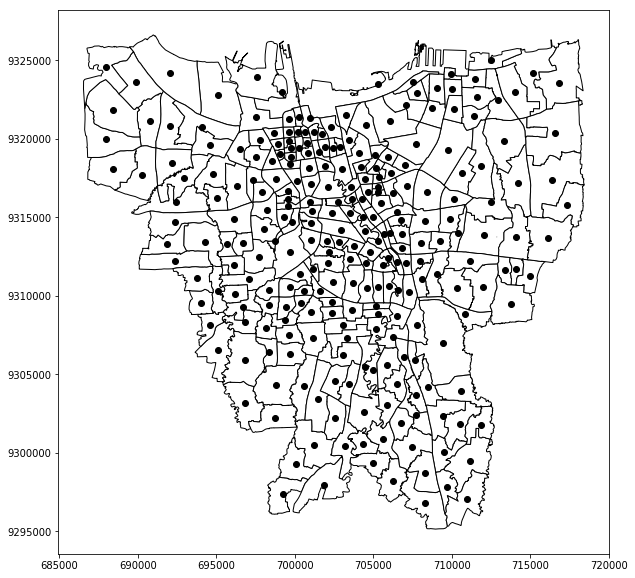

In [4]:
# Assigning the centroid to each kelurahan
fig, ax = plt.subplots(figsize=(10,10))
kelurahan.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
kelurahan.centroid.plot(ax=ax, c='black')

In [5]:
# Subsetting the dataframe
df1 = kelurahan[['Feml_Us','Mal_Usr', 'PctUnmp']].dropna()
df2 = kelurahan[['Shnnn_Ty','Shnnn_Tm','Shnnn_A']].dropna()

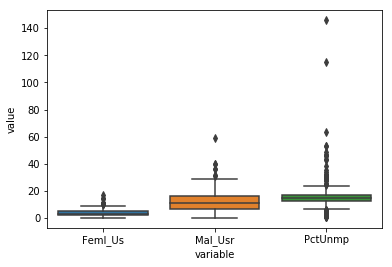

In [6]:
# Checking the outliers
sns.boxplot(x="variable", y="value", data=pd.melt(df1))

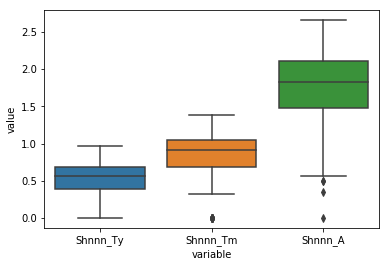

In [7]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2))

In [8]:
# Winsorising the data
Kel_Name_array = np.array(kelurahan['KEL_NAM']) # Acts as ID column
Shnnn_Ty_array = np.array(kelurahan['Shnnn_Ty']) # No need to winsorise this variable

win_Rprt_Cn_array = ss.mstats.winsorize(kelurahan['RprtsCn'], limits=[0.05, 0.05])
win_Feml_Us_array = ss.mstats.winsorize(kelurahan['Feml_Us'], limits=[0.05, 0.41])
win_Mal_Usr_array = ss.mstats.winsorize(kelurahan['Mal_Usr'], limits=[0.05, 0.15])
win_PctUnmp_array = ss.mstats.winsorize(kelurahan['PctUnmp'], limits=[0.6,0.175])
win_Shnnn_Tm_array = ss.mstats.winsorize(kelurahan['Shnnn_Tm'], limits=[0.05, 0.05])
win_Shnnn_A_array = ss.mstats.winsorize(kelurahan['Shnnn_A'], limits=[0.05, 0.05])

In [9]:
# Winsorising the data
Kel_Name_array = np.array(kelurahan['KEL_NAM']) # Acts as ID column
Shnnn_Ty_array = np.array(kelurahan['Shnnn_Ty']) # No need to winsorise this variable

win_Rprt_Cn_array = ss.mstats.winsorize(kelurahan['RprtsCn'], limits=[0.05, 0.05])
win_Feml_Us_array = ss.mstats.winsorize(kelurahan['Feml_Us'], limits=[0.05, 0.05])
win_Mal_Usr_array = ss.mstats.winsorize(kelurahan['Mal_Usr'], limits=[0.05, 0.05])
win_PctUnmp_array = ss.mstats.winsorize(kelurahan['PctUnmp'], limits=[0.05,0.05])
win_Shnnn_Tm_array = ss.mstats.winsorize(kelurahan['Shnnn_Tm'], limits=[0.05, 0.05])
win_Shnnn_A_array = ss.mstats.winsorize(kelurahan['Shnnn_A'], limits=[0.05, 0.05])

In [10]:
# Assigning the winsorised value back to the dataframe
kelurahan = kelurahan.assign(RprtCnWin = win_Rprt_Cn_array,FemaleUserWin = win_Feml_Us_array, MaleUserWin = win_Mal_Usr_array, PctUnmpWin = win_PctUnmp_array,
                            ShnnnTmWin = win_Shnnn_Tm_array, ShnnAWin = win_Shnnn_A_array)

In [11]:
kelurahan

KEL_NAM            Kecamtn          ID   Male_Pp   Feml_Pp  \
0                  ANCOL         PADEMANGAN  3175020003   15032.0   13777.0   
1                  ANGKE            TAMBORA  3174050007   17837.0   16823.0   
2           BALE KAMBANG        KRAMAT JATI  3172050001   16302.0   15780.0   
3            BALI MESTER         JATINEGARA  3172060007    5669.0    5619.0   
4             BAMBU APUS           CIPAYUNG  3172030006   14614.0   14337.0   
5                 BANGKA   MAMPANG PRAPATAN  3171070001   12768.0   12318.0   
6                   BARU         PASAR REBO  3172010003   14001.0   13150.0   
7             BATU AMPAR        KRAMAT JATI  3172050002   27017.0   26773.0   
8           CEMPAKA BARU          KEMAYORAN  3173060002   13441.0   13438.0   
9        BENDUNGAN HILIR        TANAH ABANG  3173010002   21695.0   21732.0   
10   CEMPAKA PUTIH BARAT      CEMPAKA PUTIH  3173050003   29724.0   29387.0   
11                GAMBIR             GAMBIR  3173080003   20910.0   20582.0   
12           BIDARA CINA         JATINEGARA  3172060001   11794.0   11386.0   
13   CEMPAKA PUTIH TIMUR      CEMPAKA PUTIH  3173050002   34151.0   32875.0   
14         HARAPAN MULYA          KEMAYORAN  3173060001   33759.0   32679.0   
15               BINTARO       PESANGGRAHAN  3171040001   19722.0   19149.0   
16          KEBON KOSONG          KEMAYORAN  3173060006   10824.0   10378.0   
17            BUKIT DURI              TEBET  3171090005   20721.0   20315.0   
18                BUNGUR              SENEN  3173030006   21745.0   21463.0   
19          CAKUNG BARAT             CAKUNG  3172080006   14727.0   14698.0   
20                CIKINI            MENTENG  3173020003   37729.0   36847.0   
21         JELAMBAR BARU  GROGOL PETAMBURAN  3174040007   45874.0   44686.0   
22          CAKUNG TIMUR             CAKUNG  3172080005   37323.0   37077.0   
23                CAWANG        KRAMAT JATI  3172050007    9802.0    9922.0   
24      CENGKARENG BARAT         CENGKARENG  3174070006   20876.0   20447.0   
25                CIKOKO           PANCORAN  3171080006   23423.0   23096.0   
26         JEMBATAN BESI            TAMBORA  3174050006    5156.0    5126.0   
27         JEMBATAN LIMA            TAMBORA  3174050008    6379.0    6275.0   
28      CENGKARENG TIMUR         CENGKARENG  3174070005   29422.0   29372.0   
29               PASEBAN              SENEN  3173030002   14892.0   13897.0   
..                   ...                ...         ...       ...       ...   
231                SLIPI           PALMERAH  3174030002   22034.0   21726.0   
232            SRENGSENG          KEMBANGAN  3174010002   32534.0   32763.0   
233          TEBET TIMUR              TEBET  3171090003   14239.0   14079.0   
234      SRENGSENG SAWAH          JAGAKARSA  3171010002   18326.0   17540.0   
235     SUKABUMI SELATAN        KEBON JERUK  3174020001   41528.0   41748.0   
236            SUKA PURA          CILINCING  3175060001   36855.0   35987.0   
237       SUKABUMI UTARA        KEBON JERUK  3174020002   21876.0   20904.0   
238              SUSUKAN            CIRACAS  3172020004    8405.0    8504.0   
239           TAMAN SARI         TAMAN SARI  3174060003    6189.0    6061.0   
240              TAMBORA            TAMBORA  3174050009   15373.0   15138.0   
241         TANAH SEREAL            TAMBORA  3174050003   24303.0   23107.0   
242         TANAH TINGGI         JOHAR BARU  3173040003    7489.0    7732.0   
243               TANGKI         TAMAN SARI  3174060004   22519.0   22290.0   
244        TANJUNG BARAT          JAGAKARSA  3171010006   13969.0   14112.0   
245           TEGAL ALUR          KALIDERES  3174080004    9491.0   10014.0   
246         TEGAL PARANG   MAMPANG PRAPATAN  3171070003   21205.0   20867.0   
247               TOMANG  GROGOL PETAMBURAN  3174040003   12053.0   12528.0   
248         TUGU SELATAN               KOJA  3175040002   10179.0   10843.0   
249           TUGU UTARA               KOJA  3175040003   47380.0  

In [12]:
# Transforming the values into z-score
kelurahan_a = kelurahan[['RprtCnWin','FemaleUserWin','MaleUserWin','PctUnmpWin','ShnnnTmWin','ShnnAWin']]
kelurahan_centered = kelurahan_a.apply(zscore)
kelurahan_centered

RprtCnWin  FemaleUserWin  MaleUserWin  PctUnmpWin  ShnnnTmWin  ShnnAWin
0     0.015100      -0.218011    -0.454006   -0.217157    0.308403 -0.143367
1     0.391210      -0.607744     0.197069   -1.385462    0.517111 -1.079610
2    -0.827060       0.171721    -0.779544    1.136865    0.841357 -0.276400
3     0.252212      -0.997477     0.848144   -0.443705    0.017909  0.480175
4    -1.129584      -0.218011     0.522606    0.010709    0.089790  0.084489
5     2.083705       0.951187     1.336450    0.997248    1.295315  0.156692
6    -1.154112      -0.607744    -0.616775    0.091054   -2.732257  0.941386
7    -0.957881       0.561454     0.685375   -0.417363   -0.661776  1.119468
8    -1.023292       0.171721    -0.128469   -0.073588   -2.732257  1.293160
9     2.402581       2.120386     1.336450    0.571811    1.080290  0.951338
10   -0.140250      -0.218011     0.034300   -0.213205    0.315294 -0.356058
11    0.113215      -0.997477    -0.942313   -0.738745    1.295892  1.174958
12    1.233369      -0.218011     2.150294   -0.232963   -0.463394 -0.300628
13    2.402581       2.120386     2.150294   -0.442388   -0.299325  1.071329
14   -0.647181      -0.997477    -0.291238   -0.184228   -0.117810  0.732162
15   -0.900647       1.730653     0.197069    1.657137    0.557683  0.591286
16   -0.859765       0.951187    -0.291238    0.010709    0.718545 -1.276165
17   -0.589947       0.561454     1.499219    1.717725    0.080607  0.959144
18   -0.450950      -0.607744    -0.128469    0.790457   -0.487191  1.453291
19    1.936532       2.120386     2.150294    0.266234   -0.633534 -1.985305
20   -0.385540       0.171721    -0.291238    2.639725   -0.600077  0.923170
21    0.284918       0.561454     0.034300   -0.172374    1.211606  1.056701
22   -0.164779       1.730653     0.848144    0.112129    0.951316  0.161557
23    0.979904       0.561454     1.010912   -0.196083    0.177578  0.323355
24    1.045314       2.120386     2.150294    0.196426    0.828971  0.676850
25   -1.088702      -0.997477     0.359837    1.958762    0.649792  0.647046
26    1.805711       0.171721     0.197069   -1.395999    0.731792 -0.952547
27   -0.107545      -0.607744    -0.454006    0.208280   -0.113698  0.323355
28    0.031452       2.120386     2.150294    0.091054    0.251763  1.138523
29   -0.246542      -0.607744    -0.942313   -0.056466    0.285137  0.456884
..         ...            ...          ...         ...         ...       ...
231   2.402581      -0.607744     0.197069   -1.609376    0.616402  0.941386
232   0.415739       1.730653    -1.105081   -0.127591    0.275154 -0.150501
233   0.579265       0.561454    -1.105081    2.639725   -0.051928  0.173372
234   0.194978      -0.607744     0.522606   -0.085443    0.147449 -0.028904
235  -0.794355      -0.997477    -0.454006   -0.099931   -1.224845  0.783740
236  -0.630829      -0.607744    -0.942313   -0.018268    0.065082  0.951338
237  -1.072349       0.951187     0.848144    0.262283    0.437036 -1.985305
238  -0.352834      -0.997477    -0.128469    0.002806    0.277043 -1.126859
239  -1.039644      -1.387210    -0.779544    0.050223    0.376485 -0.665037
240  -0.745297      -0.997477    -0.942313    0.384777   -0.484792  0.340211
241   0.922670      -0.607744    -0.942313   -0.862557    0.586256 -0.872071
242   0.039628      -0.607744    -0.942313    0.048906    0.461943 -1.542928
243  -1.154112      -0.997477    -1.430619    2.079939   -0.543055  0.172818
244   0.342152       0.171721    -0.942313    0.113446    0.732022 -1.985305
245  -0.385540      -0.218011     1.661988    0.072614    0.386218 -1.356273
246  -0.066664      -0.218011    -0.291238    0.686403    1.257980 -0.998265
247   0.571088      -0.607744     0.197069   -0.334383    1.189463  1.350445
248  -0.966057       0.951187    -1.430619   -1.609376   -0.903069  0.496093
249  -0.810708      -1.387210    -0.128469   -1.609376    0.557683  1.395824
250  -0.017606       0.951187     0.197069   -1.609376   -1.322586 -0.064371
2

In [13]:
# Adding the columns back to the dataframe
kelurahan = kelurahan.assign(RprtCnWin1 = kelurahan_centered[['RprtCnWin']], FemaleUserWin1 = kelurahan_centered[['FemaleUserWin']], MaleUserWin1 = kelurahan_centered[['MaleUserWin']], PctUnmpWin1 = kelurahan_centered[['PctUnmpWin']],
                            ShnnnTmWin1 = kelurahan_centered[['ShnnnTmWin']], ShnnAWin1 = kelurahan_centered[['ShnnAWin']] )
kelurahan

KEL_NAM            Kecamtn          ID   Male_Pp   Feml_Pp  \
0                  ANCOL         PADEMANGAN  3175020003   15032.0   13777.0   
1                  ANGKE            TAMBORA  3174050007   17837.0   16823.0   
2           BALE KAMBANG        KRAMAT JATI  3172050001   16302.0   15780.0   
3            BALI MESTER         JATINEGARA  3172060007    5669.0    5619.0   
4             BAMBU APUS           CIPAYUNG  3172030006   14614.0   14337.0   
5                 BANGKA   MAMPANG PRAPATAN  3171070001   12768.0   12318.0   
6                   BARU         PASAR REBO  3172010003   14001.0   13150.0   
7             BATU AMPAR        KRAMAT JATI  3172050002   27017.0   26773.0   
8           CEMPAKA BARU          KEMAYORAN  3173060002   13441.0   13438.0   
9        BENDUNGAN HILIR        TANAH ABANG  3173010002   21695.0   21732.0   
10   CEMPAKA PUTIH BARAT      CEMPAKA PUTIH  3173050003   29724.0   29387.0   
11                GAMBIR             GAMBIR  3173080003   20910.0   20582.0   
12           BIDARA CINA         JATINEGARA  3172060001   11794.0   11386.0   
13   CEMPAKA PUTIH TIMUR      CEMPAKA PUTIH  3173050002   34151.0   32875.0   
14         HARAPAN MULYA          KEMAYORAN  3173060001   33759.0   32679.0   
15               BINTARO       PESANGGRAHAN  3171040001   19722.0   19149.0   
16          KEBON KOSONG          KEMAYORAN  3173060006   10824.0   10378.0   
17            BUKIT DURI              TEBET  3171090005   20721.0   20315.0   
18                BUNGUR              SENEN  3173030006   21745.0   21463.0   
19          CAKUNG BARAT             CAKUNG  3172080006   14727.0   14698.0   
20                CIKINI            MENTENG  3173020003   37729.0   36847.0   
21         JELAMBAR BARU  GROGOL PETAMBURAN  3174040007   45874.0   44686.0   
22          CAKUNG TIMUR             CAKUNG  3172080005   37323.0   37077.0   
23                CAWANG        KRAMAT JATI  3172050007    9802.0    9922.0   
24      CENGKARENG BARAT         CENGKARENG  3174070006   20876.0   20447.0   
25                CIKOKO           PANCORAN  3171080006   23423.0   23096.0   
26         JEMBATAN BESI            TAMBORA  3174050006    5156.0    5126.0   
27         JEMBATAN LIMA            TAMBORA  3174050008    6379.0    6275.0   
28      CENGKARENG TIMUR         CENGKARENG  3174070005   29422.0   29372.0   
29               PASEBAN              SENEN  3173030002   14892.0   13897.0   
..                   ...                ...         ...       ...       ...   
231                SLIPI           PALMERAH  3174030002   22034.0   21726.0   
232            SRENGSENG          KEMBANGAN  3174010002   32534.0   32763.0   
233          TEBET TIMUR              TEBET  3171090003   14239.0   14079.0   
234      SRENGSENG SAWAH          JAGAKARSA  3171010002   18326.0   17540.0   
235     SUKABUMI SELATAN        KEBON JERUK  3174020001   41528.0   41748.0   
236            SUKA PURA          CILINCING  3175060001   36855.0   35987.0   
237       SUKABUMI UTARA        KEBON JERUK  3174020002   21876.0   20904.0   
238              SUSUKAN            CIRACAS  3172020004    8405.0    8504.0   
239           TAMAN SARI         TAMAN SARI  3174060003    6189.0    6061.0   
240              TAMBORA            TAMBORA  3174050009   15373.0   15138.0   
241         TANAH SEREAL            TAMBORA  3174050003   24303.0   23107.0   
242         TANAH TINGGI         JOHAR BARU  3173040003    7489.0    7732.0   
243               TANGKI         TAMAN SARI  3174060004   22519.0   22290.0   
244        TANJUNG BARAT          JAGAKARSA  3171010006   13969.0   14112.0   
245           TEGAL ALUR          KALIDERES  3174080004    9491.0   10014.0   
246         TEGAL PARANG   MAMPANG PRAPATAN  3171070003   21205.0   20867.0   
247               TOMANG  GROGOL PETAMBURAN  3174040003   12053.0   12528.0   
248         TUGU SELATAN               KOJA  3175040002   10179.0   10843.0   
249           TUGU UTARA               KOJA  3175040003   47380.0  

### OLS Regression

In [14]:
# OLS Regression
lm = smf.ols(formula='RprtCnWin1 ~ FemaleUserWin1 + MaleUserWin1 + PctUnmpWin1 + Shnnn_Ty + ShnnnTmWin1 + ShnnAWin1', data=kelurahan).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             RprtCnWin1   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     26.67
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.42e-24
Time:                        09:43:26   Log-Likelihood:                -306.58
No. Observations:                 261   AIC:                             627.2
Df Residuals:                     254   BIC:                             652.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1615      0.135     -1.

### GWR

In [15]:
# Checking the VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = lm.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[7.5484321583533545,
 1.5515460461372006,
 1.685327353219388,
 1.0281678230914828,
 1.133761611061642,
 1.1874796643958,
 1.0328317952648658]

In [16]:
# Normalising values 
kelurahan[['FemaleUserWin1']] = kelurahan['FemaleUserWin1'].values.reshape((-1,1))
kelurahan[['MaleUserWin1']] = kelurahan['MaleUserWin1'].values.reshape((-1,1))
kelurahan[['PctUnmpWin1']] = kelurahan['PctUnmpWin1'].values.reshape((-1,1))
kelurahan[['ShnnnTmWin1']] = kelurahan['ShnnnTmWin1'].values.reshape((-1,1))

In [17]:
# Preparing the variables for GWR and MGWR
a_y = kelurahan['RprtCnWin1'].values.reshape((-1,1))
a_X = kelurahan[['FemaleUserWin1','MaleUserWin1', 'PctUnmpWin1', 'ShnnnTmWin1']].values
p = kelurahan['coord_x']
q = kelurahan['coord_y']
a_coords = list(zip(p,q))

a_X = (a_X - a_X.mean(axis=0)) / a_X.std(axis=0)

a_y = (a_y - a_y.mean(axis=0)) / a_y.std(axis=0)

In [18]:
# GWR model

gwr_selector = Sel_BW(a_coords, a_y, a_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(a_coords, a_y, a_X, gwr_bw).fit()

118.0


In [19]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 261
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            161.262
Log-likelihood:                                                    -307.509
AIC:                                                                625.017
AICc:                                                               627.348
BIC:                                                              -1263.255
R2:                                                                   0.382
Adj. R2:                                                              0.372

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

### MGWR

In [20]:
# Calibrating MGWR model

mgwr_selector = Sel_BW(a_coords, a_y, a_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[5])
print(mgwr_bw)
mgwr_results = MGWR(a_coords, a_y, a_X, mgwr_selector).fit()

[ 24.  52. 260. 229.  61.]


In [21]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 261
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            161.262
Log-likelihood:                                                    -307.509
AIC:                                                                625.017
AICc:                                                               627.348
BIC:                                                              -1263.255
R2:                                                                   0.382
Adj. R2:                                                              0.372

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

### Preparing GWR results for mapping

In [22]:
# Adding GWR parameters to GeoDataframe
kelurahan['gwr_intercept'] = gwr_results.params[:,0]
kelurahan['gwr_female'] = gwr_results.params[:,1]
kelurahan['gwr_male'] = gwr_results.params[:,2]
kelurahan['gwr_pctunmp'] = gwr_results.params[:,3]
kelurahan['gwr_time'] = gwr_results.params[:,4]


# Obtaining t-values filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

In [23]:
gwr_filtered_t

array([[0.        , 0.        , 0.        , 0.        , 3.54345878],
       [2.91653991, 0.        , 3.18743396, 0.        , 3.51525054],
       [0.        , 0.        , 4.23963628, 0.        , 2.68177714],
       ...,
       [0.        , 3.65630757, 0.        , 0.        , 3.73692117],
       [0.        , 3.47512373, 0.        , 0.        , 3.30691805],
       [0.        , 0.        , 4.66947968, 0.        , 0.        ]])

In [24]:
# Preparing MGWR results for mapping

# Adding MGWR parameters to GeoDataframe
kelurahan['mgwr_intercept'] = mgwr_results.params[:,0]
kelurahan['mgwr_female'] = mgwr_results.params[:,1]
kelurahan['mgwr_male'] = mgwr_results.params[:,2]
kelurahan['mgwr_pctunmp'] = mgwr_results.params[:,3]
kelurahan['mgwr_time'] = mgwr_results.params[:,4]

# Obtaining t-values filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals(alpha = 0.05)

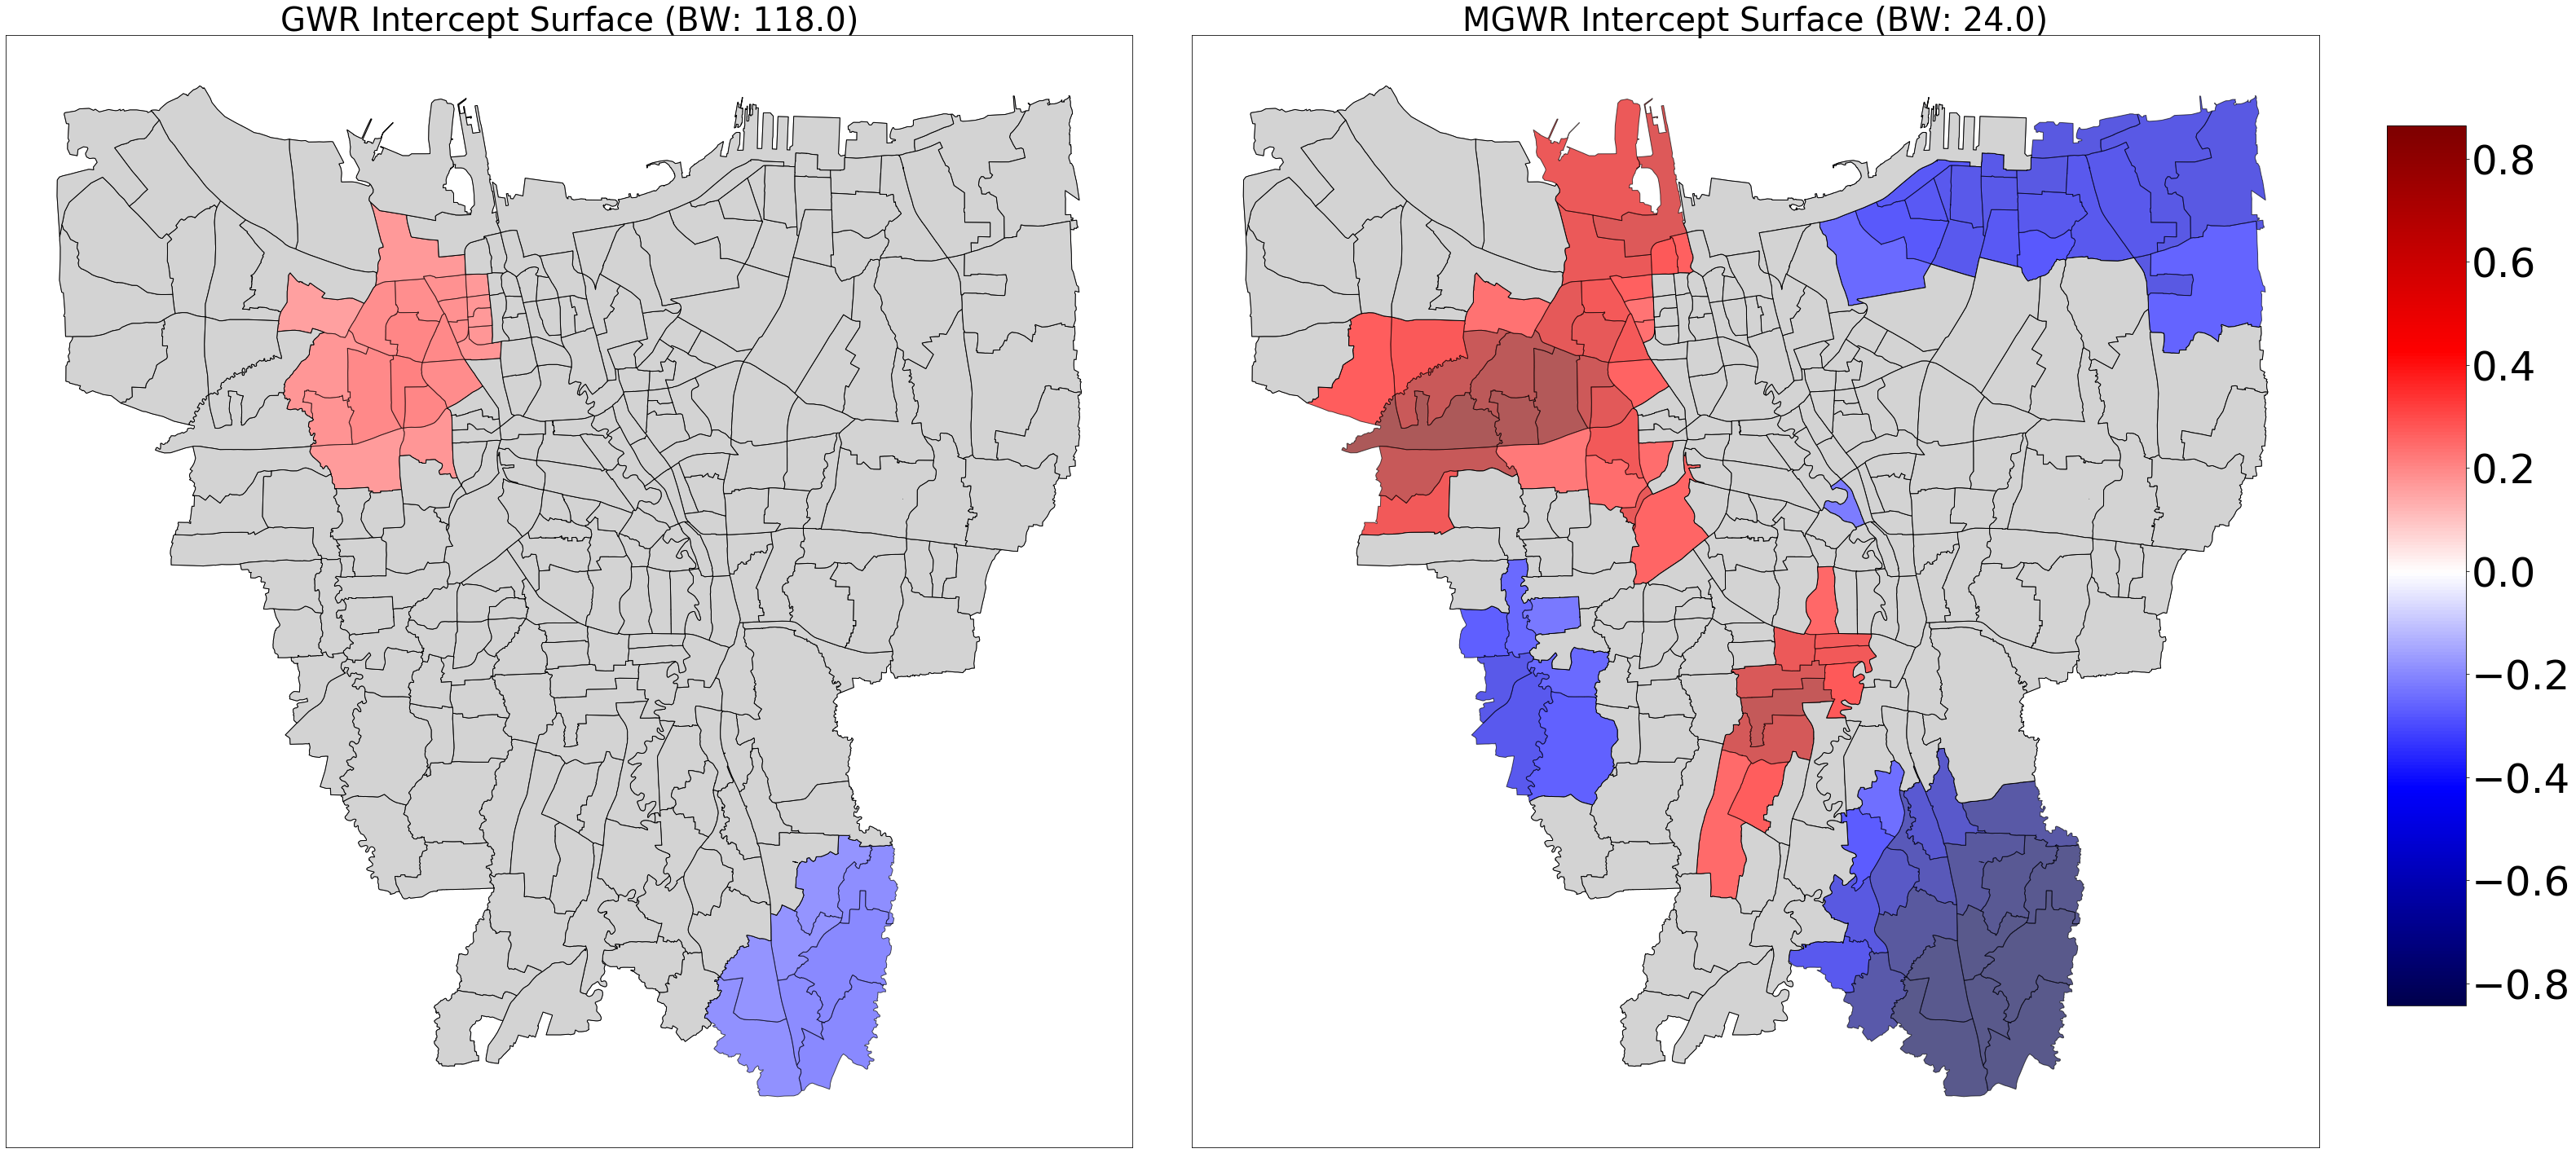

In [25]:
# Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

# Preparing plot and adding axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Intercept Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Intercept Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

# Setting color map
cmap = plt.cm.seismic

# Finding min and max values of the two combined datasets
gwr_min = kelurahan['gwr_intercept'].min()
gwr_max = kelurahan['gwr_intercept'].max()
mgwr_min = kelurahan['mgwr_intercept'].min()
mgwr_max = kelurahan['mgwr_intercept'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

# If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
# If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
# Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

# Creating scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Plotting GWR parameters
kelurahan.plot('gwr_intercept', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
# If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    kelurahan[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

# Plotting MGWR parameters
kelurahan.plot('mgwr_intercept', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
# If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    kelurahan[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
# Setting figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()



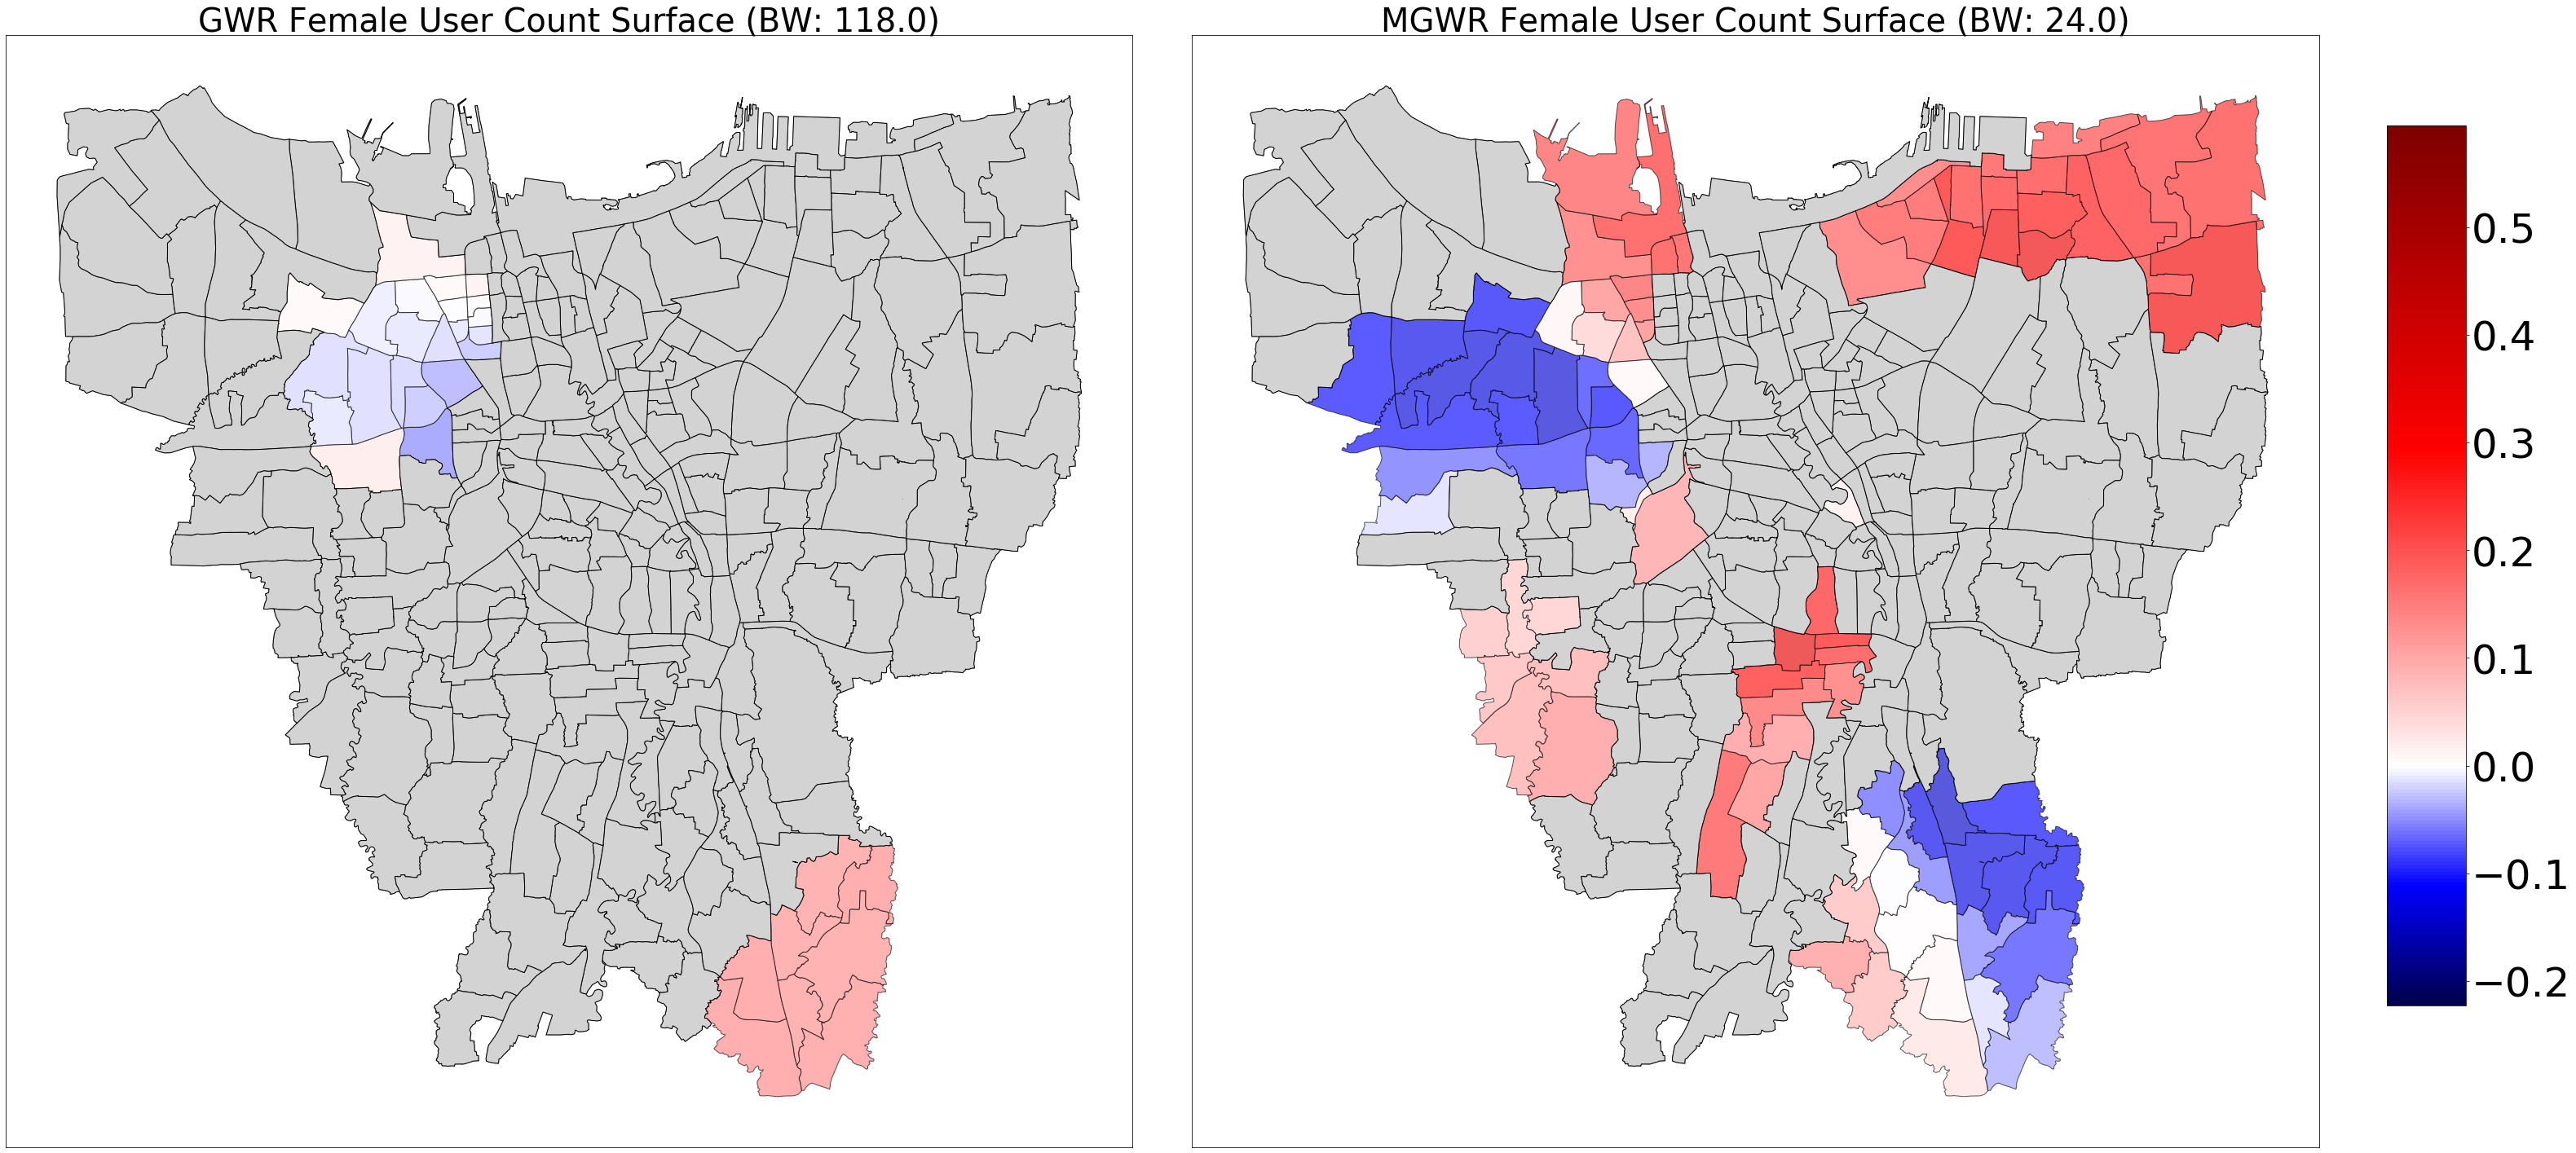

In [26]:
#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Female User Count Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Female User Count Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = kelurahan['gwr_female'].min()
gwr_max = kelurahan['gwr_female'].max()
mgwr_min = kelurahan['mgwr_female'].min()
mgwr_max = kelurahan['mgwr_female'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))


#Plot GWR parameters
kelurahan.plot('gwr_female', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    kelurahan[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
kelurahan.plot('mgwr_female', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    kelurahan[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

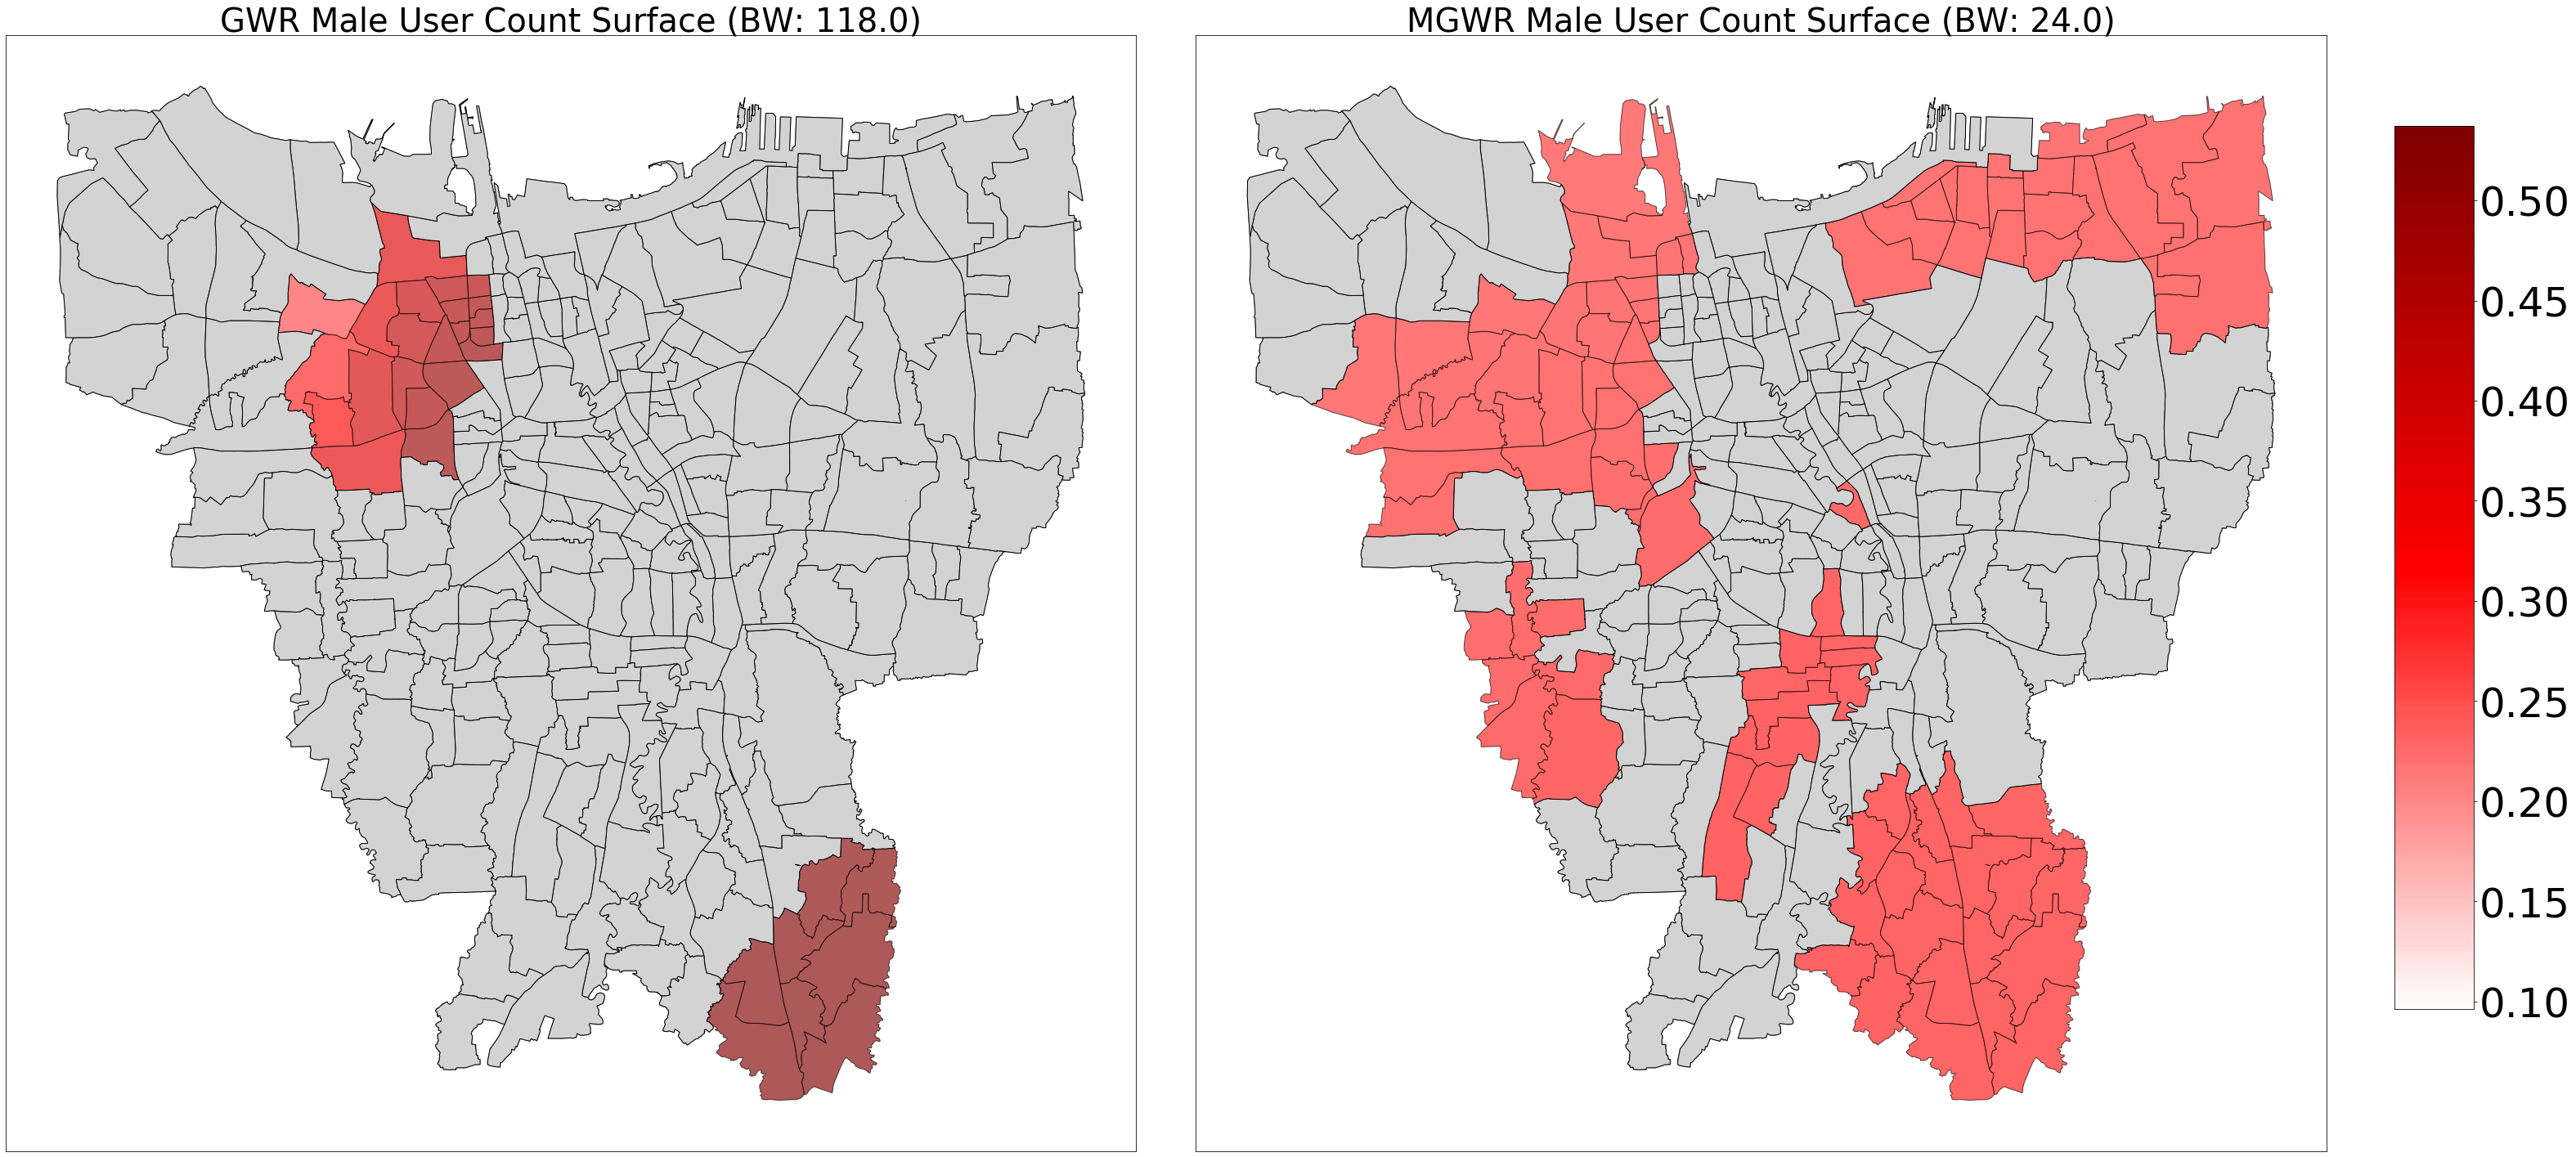

In [27]:
#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Male User Count Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Male User Count Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = kelurahan['gwr_male'].min()
gwr_max = kelurahan['gwr_male'].max()
mgwr_min = kelurahan['mgwr_male'].min()
mgwr_max = kelurahan['mgwr_male'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))


#Plot GWR parameters
kelurahan.plot('gwr_male', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    kelurahan[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
kelurahan.plot('mgwr_male', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    kelurahan[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

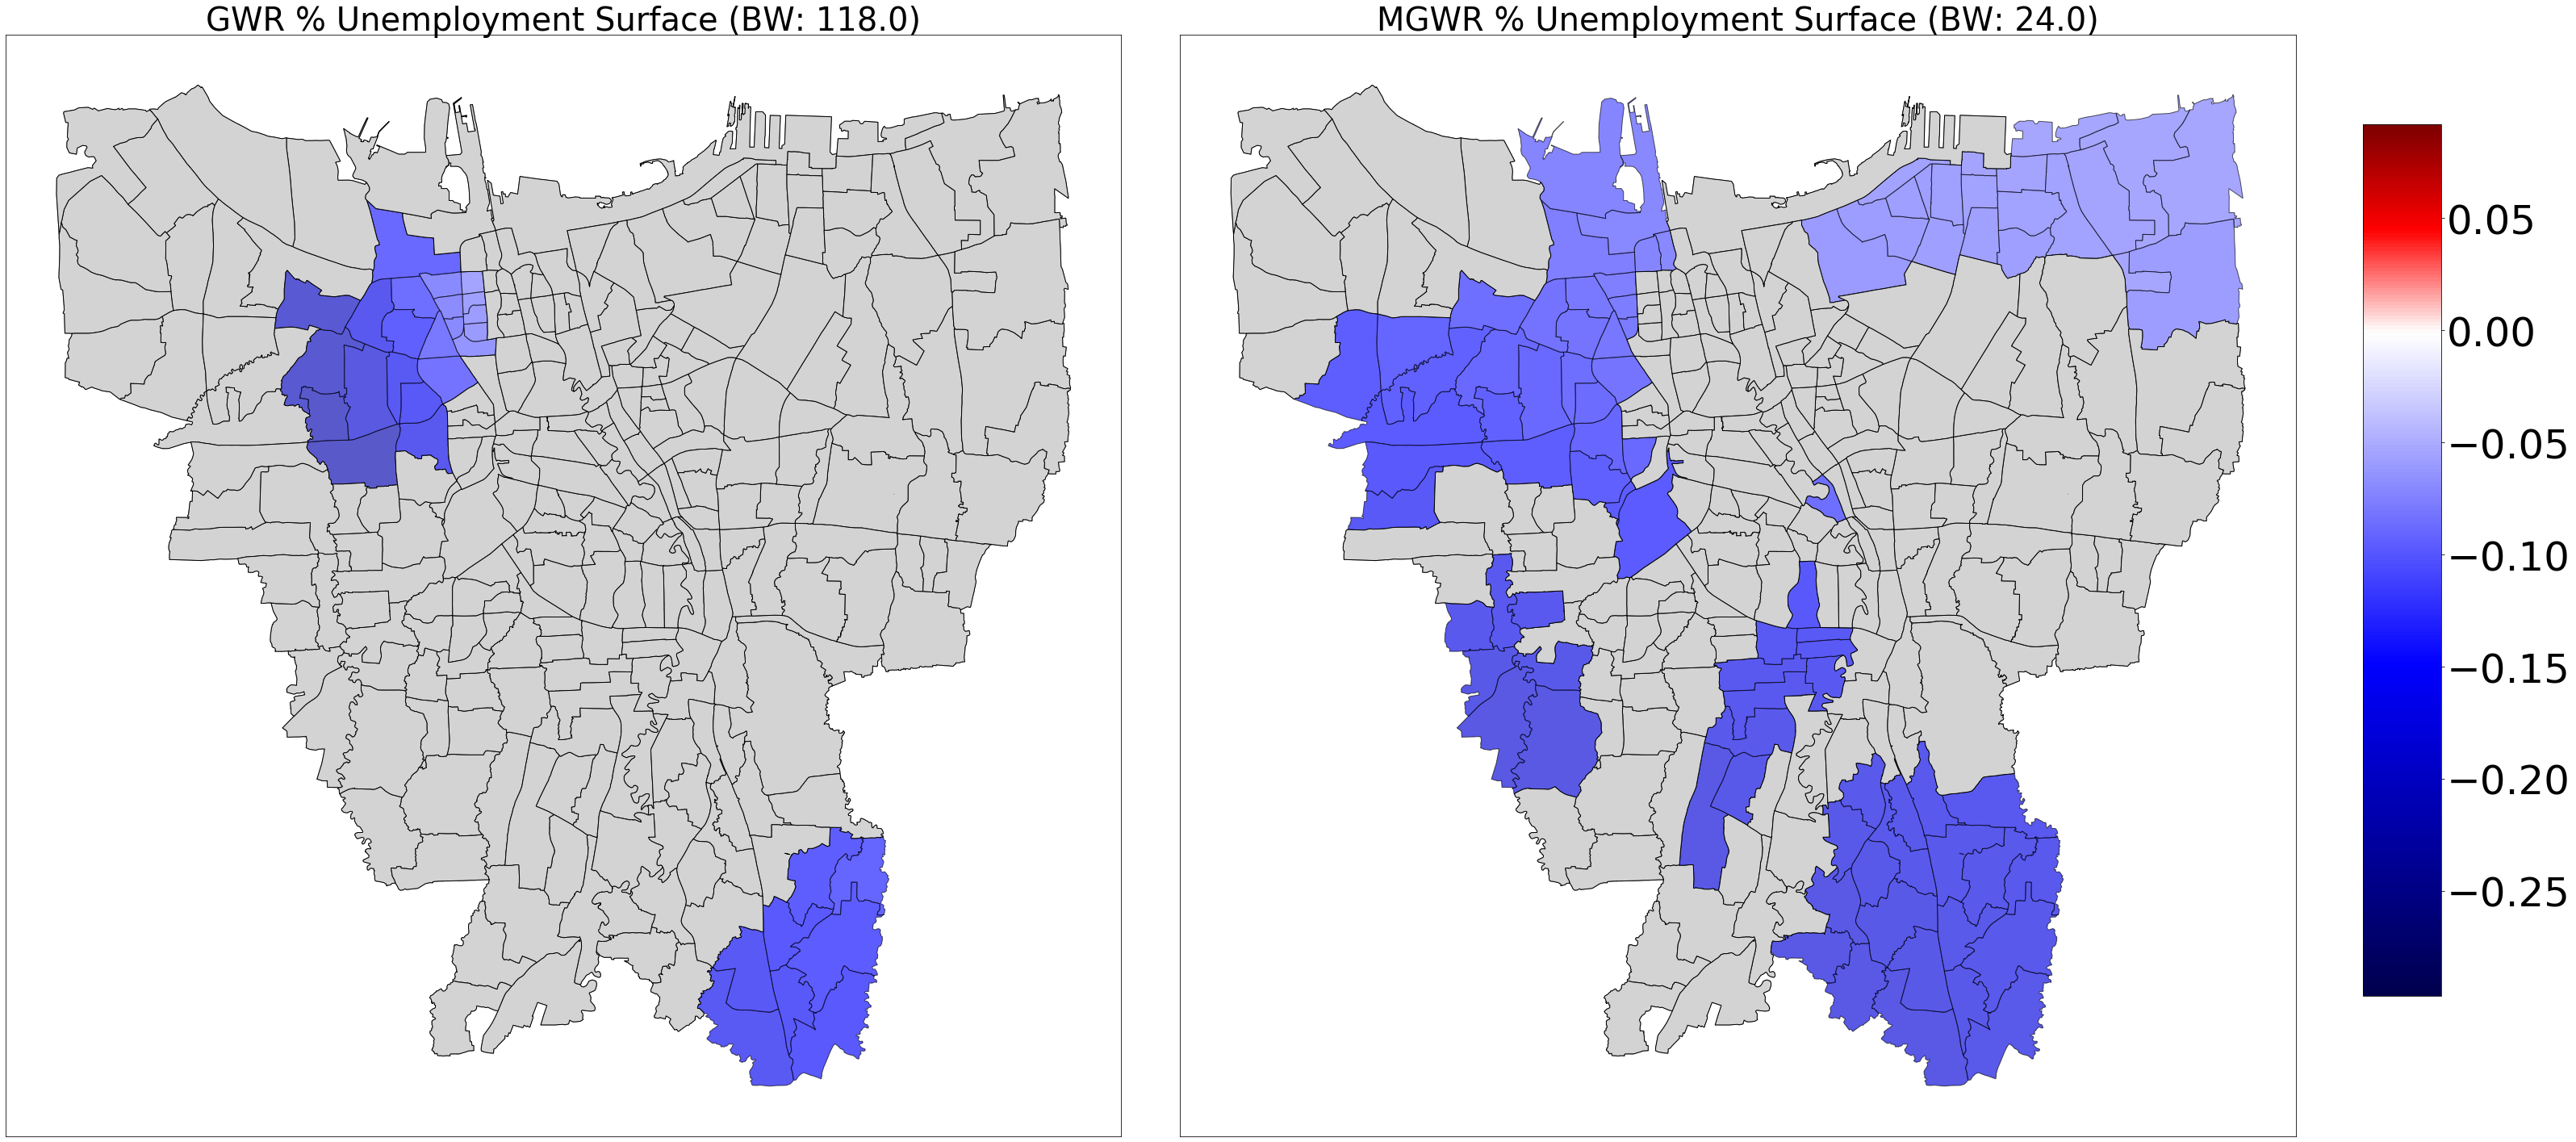

In [28]:
#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR % Unemployment Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR % Unemployment Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = kelurahan['gwr_pctunmp'].min()
gwr_max = kelurahan['gwr_pctunmp'].max()
mgwr_min = kelurahan['mgwr_pctunmp'].min()
mgwr_max = kelurahan['mgwr_pctunmp'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))


#Plot GWR parameters
kelurahan.plot('gwr_pctunmp', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    kelurahan[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
kelurahan.plot('mgwr_pctunmp', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    kelurahan[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

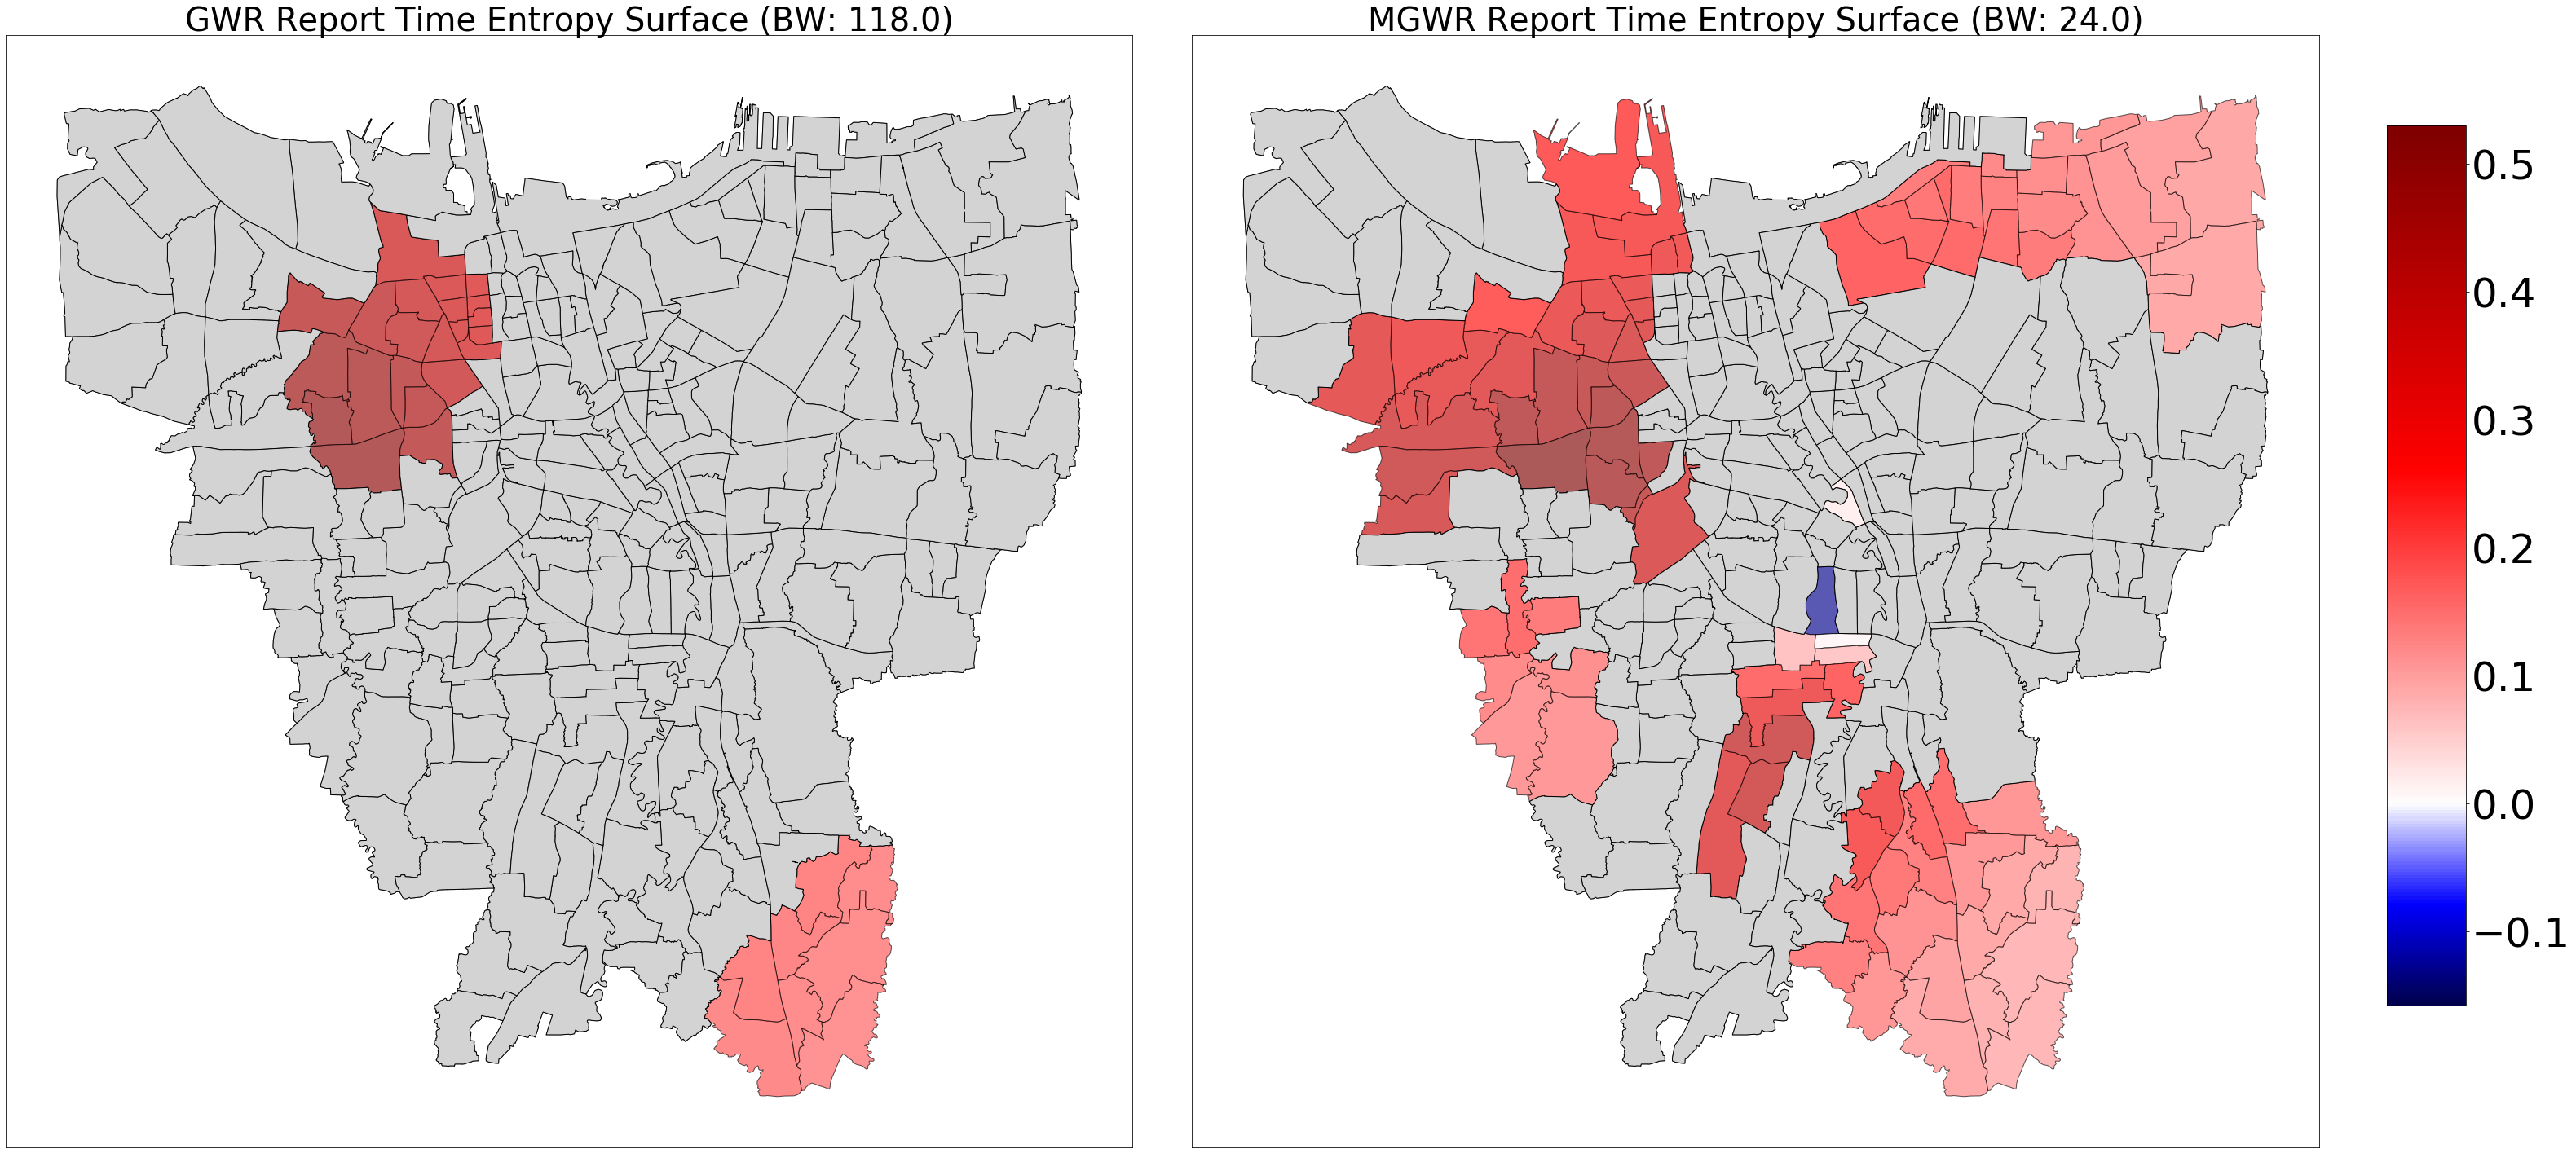

In [29]:
#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Report Time Entropy Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Report Time Entropy Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = kelurahan['gwr_time'].min()
gwr_max = kelurahan['gwr_time'].max()
mgwr_min = kelurahan['mgwr_time'].min()
mgwr_max = kelurahan['mgwr_time'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))


#Plot GWR parameters
kelurahan.plot('gwr_time', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    kelurahan[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
kelurahan.plot('mgwr_time', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    kelurahan[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()



### Simulating if every predictor increases by 1 unit

In [30]:
kelurahan['GWR_Sim'] = kelurahan['gwr_intercept'] + kelurahan['gwr_female'] + kelurahan['gwr_male'] + kelurahan['gwr_pctunmp'] + kelurahan['gwr_time']
kelurahan['MGWR_Sim'] = kelurahan['mgwr_intercept'] + kelurahan['mgwr_male'] + kelurahan['mgwr_pctunmp'] + kelurahan['mgwr_time']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


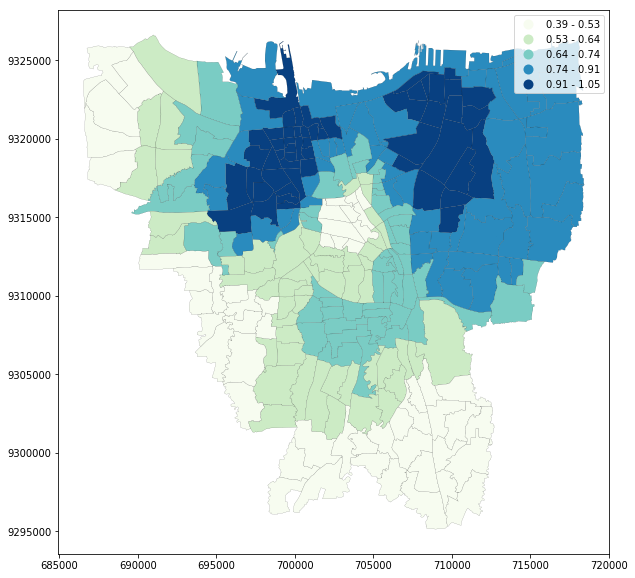

In [31]:
# GWR
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
kelurahan.plot(column='GWR_Sim', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax, edgecolor = 'black', linewidth=0.1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


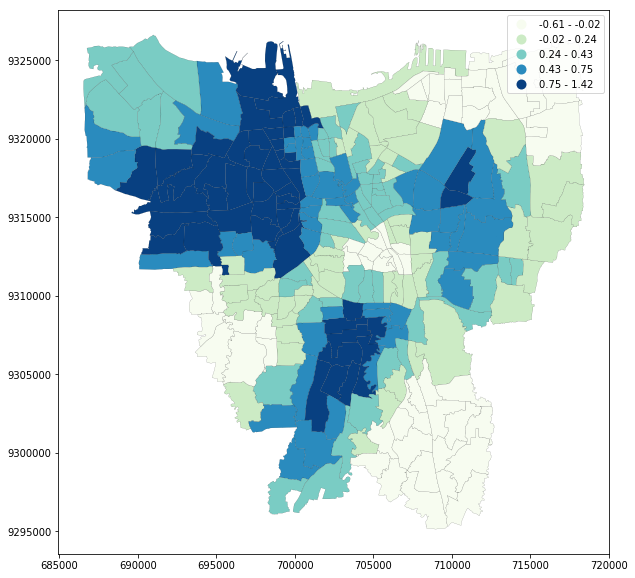

In [32]:
# MGWR
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
kelurahan.plot(column='MGWR_Sim', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax, edgecolor = 'black', linewidth=0.1)

### Comparing t-values for each variable of MGWR

In [33]:
# Obtaining t-values of each variable from MGWR results
kelurahan['mgwr_female_tval'] = mgwr_filtered_t[:,1]
kelurahan['mgwr_male_tval'] = mgwr_filtered_t[:,2]
kelurahan['mgwr_pctunmp_tval'] = mgwr_filtered_t[:,3]
kelurahan['mgwr_time_tval'] = mgwr_filtered_t[:,4]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 3
  Warn('Warning: setting k to %d' % k_q, UserWarning)


Text(0.5, 1.0, 'MGWR t-value of Female User Count (BW: 52.0)')

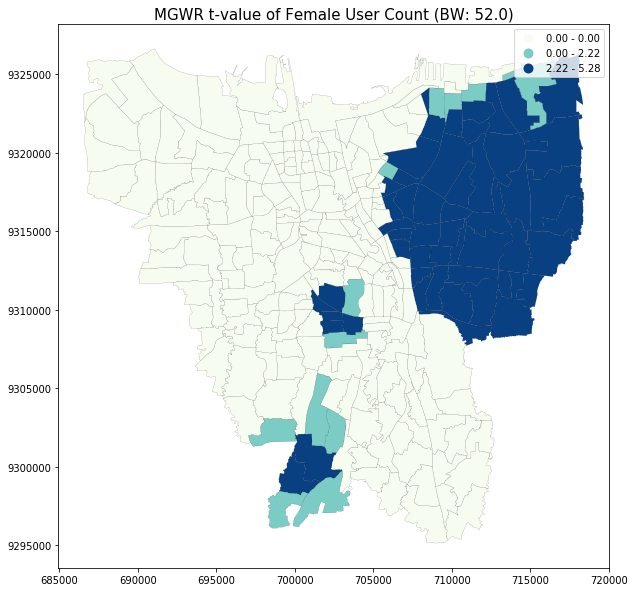

In [34]:
# Mapping t-values
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
kelurahan.plot(column='mgwr_female_tval', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax,edgecolor = 'black', linewidth=0.1)
ax.set_title('MGWR t-value of Female User Count (BW: ' + str(mgwr_bw[1]) +')', fontsize=15)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'MGWR t-value of Male User Count (BW: 260.0)')

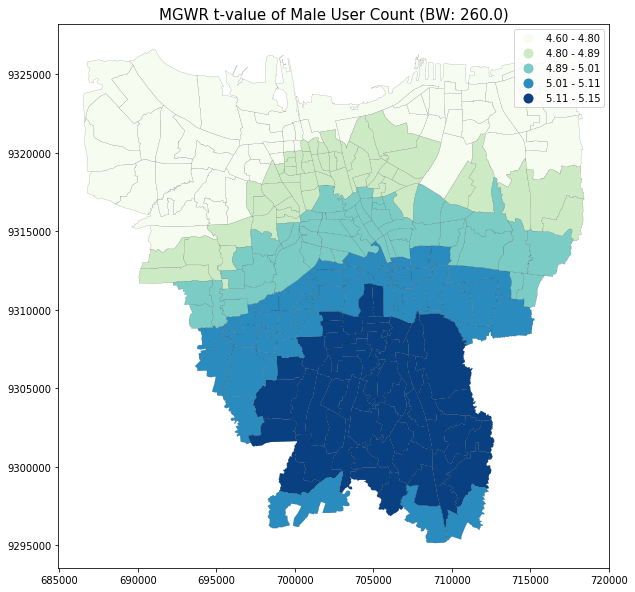

In [35]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
kelurahan.plot(column='mgwr_male_tval', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax,edgecolor = 'black', linewidth=0.1)
ax.set_title('MGWR t-value of Male User Count (BW: ' + str(mgwr_bw[2]) +')', fontsize=15)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'MGWR t-value of % Unemployment (BW: 229.0)')

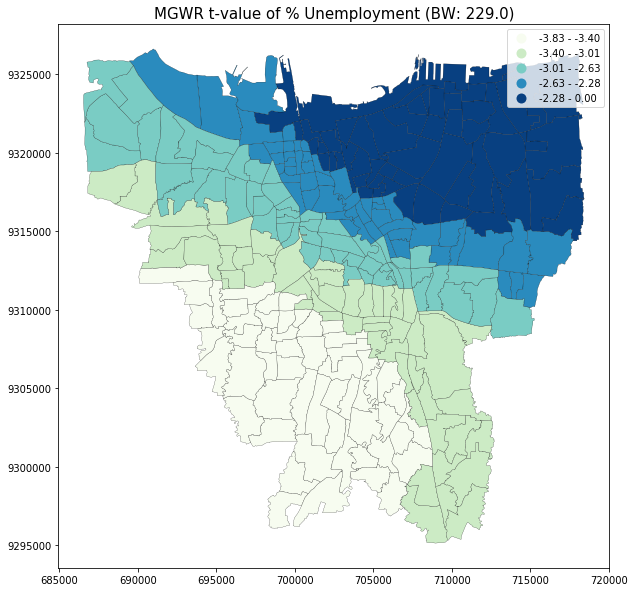

In [38]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
kelurahan.plot(column='mgwr_pctunmp_tval', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax, edgecolor = 'black', linewidth=0.2)
ax.set_title('MGWR t-value of % Unemployment (BW: ' + str(mgwr_bw[3]) +')', fontsize=15)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 4
  Warn('Warning: setting k to %d' % k_q, UserWarning)


Text(0.5, 1.0, 'MGWR t-value of Report Time Entropy (BW: 61.0)')

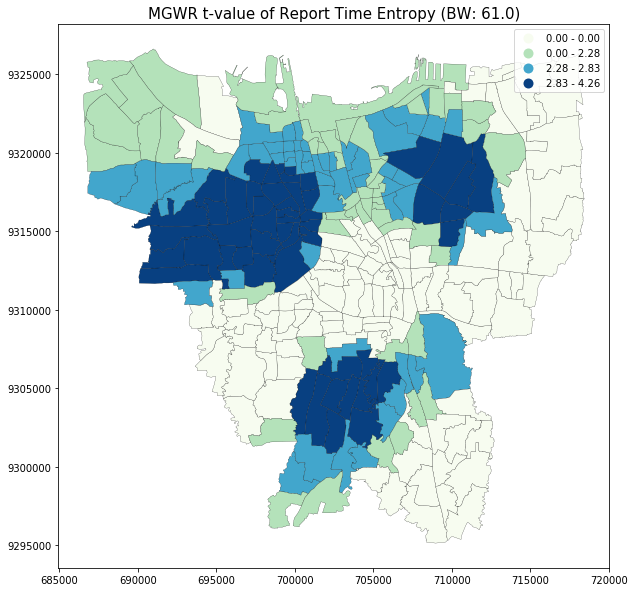

In [37]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
kelurahan.plot(column='mgwr_time_tval', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax, edgecolor = 'black', linewidth=0.2)
ax.set_title('MGWR t-value of Report Time Entropy (BW: ' + str(mgwr_bw[4]) +')', fontsize=15)

### References

Oshan T. M. et al. (2019). <i> mgwr: A Python Implementation of Multiscale Geographically Weighted Regression for Investigating Process Spatial Heterogeneity and Scale.</i> ISPRS International Journal of Geo-Information Vol. 8 (6). DOI: 10.3390/ijgi8060269